In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [7]:
# 1) Load data  (change the path if your CSV is elsewhere)
csv_path = "student_admission_dataset.csv"  # or "/mnt/data/student_admission_dataset.csv"
df = pd.read_csv(csv_path)

# 2) Show structure & basic stats
print("=== .info() ===")
print(df.info())

=== .info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GPA                         250 non-null    float64
 1   SAT_Score                   250 non-null    int64  
 2   Extracurricular_Activities  250 non-null    int64  
 3   Admission_Status            250 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB
None


In [8]:
print("\n=== .describe() (numeric features) ===")
print(df.describe())


=== .describe() (numeric features) ===
              GPA    SAT_Score  Extracurricular_Activities
count  250.000000   250.000000                  250.000000
mean     3.238320  1250.432000                    5.204000
std      0.438607   204.733163                    2.964716
min      2.500000   900.000000                    0.000000
25%      2.850000  1080.250000                    3.000000
50%      3.230000  1237.000000                    5.000000
75%      3.590000  1426.000000                    7.750000
max      4.000000  1598.000000                   10.000000


In [14]:
print(" Admission_Status value counts ")
print(df["Admission_Status"].value_counts())

 Admission_Status value counts 
Admission_Status
Waitlisted    88
Rejected      81
Accepted      81
Name: count, dtype: int64


In [15]:
print("Admission_Status percentage")
print((df["Admission_Status"].value_counts(normalize=True) * 100).round(2).astype(str) + "%")

Admission_Status percentage
Admission_Status
Waitlisted    35.2%
Rejected      32.4%
Accepted      32.4%
Name: proportion, dtype: object


In [16]:
# 3) Correlation (numeric only)
print("\n=== Correlation matrix (numeric features) ===")
print(df.select_dtypes(include="number").corr(numeric_only=True))


=== Correlation matrix (numeric features) ===
                                 GPA  SAT_Score  Extracurricular_Activities
GPA                         1.000000  -0.014171                   -0.025678
SAT_Score                  -0.014171   1.000000                    0.064365
Extracurricular_Activities -0.025678   0.064365                    1.000000


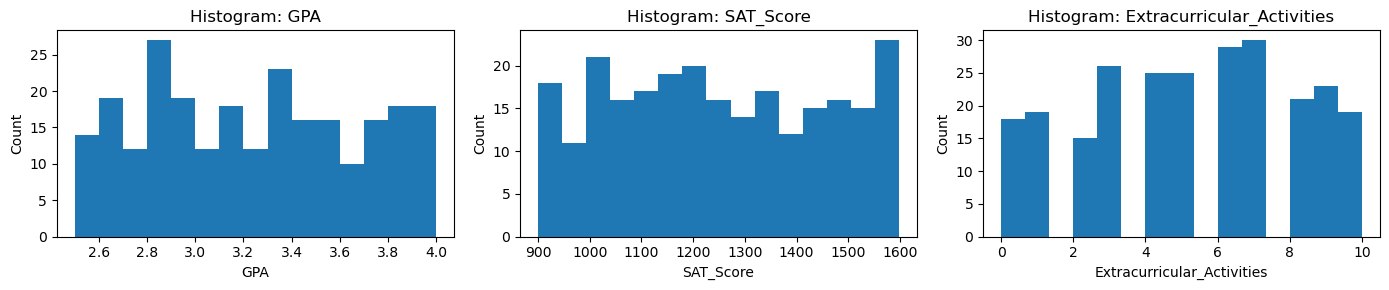

In [17]:
# Histograms for numeric features
num_cols = ["GPA", "SAT_Score", "Extracurricular_Activities"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(14, 3))
for ax, col in zip(axes, num_cols):
    ax.hist(df[col], bins=15)
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col); ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


In [18]:
df["Admission_Status"] = df["Admission_Status"].astype(str).str.strip()

In [21]:
# Encode target (handles Accepted/Rejected/Waitlisted)
le = LabelEncoder()
y = le.fit_transform(df["Admission_Status"])

In [22]:
# Use two features for a 2D boundary
X = df[["GPA", "SAT_Score"]]

In [23]:
# Split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Train
clf = LogisticRegression(max_iter=1000)
clf.fit(X_tr, y_tr)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
# Evaluate
y_hat = clf.predict(X_te)
print("Classes:", list(le.classes_))
print("Accuracy:", accuracy_score(y_te, y_hat))
print("\nClassification report:\n", classification_report(y_te, y_hat, target_names=le.classes_))

Classes: ['Accepted', 'Rejected', 'Waitlisted']
Accuracy: 0.5

Classification report:
               precision    recall  f1-score   support

    Accepted       0.50      0.56      0.53        16
    Rejected       0.50      0.56      0.53        16
  Waitlisted       0.50      0.39      0.44        18

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.50      0.50      0.50        50



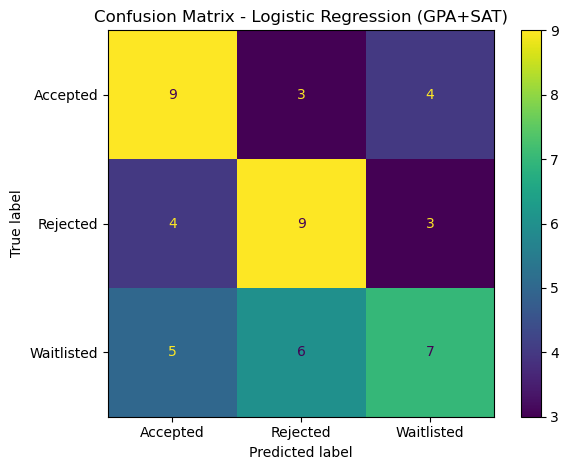

In [28]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_te, y_hat, display_labels=le.classes_)
plt.title("Confusion Matrix - Logistic Regression (GPA+SAT)")
plt.tight_layout()
plt.show()